In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

In [3]:
series

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

In [4]:
# calculate residuals from a persistence forecast

In [5]:
# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

In [6]:
dataframe

,t,t+1
0,NaN,35
1,35.0,32
2,32.0,30
3,30.0,31
4,31.0,44
...,...,...
360,34.0,37
361,37.0,52
362,52.0,48
363,48.0,55


In [7]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [8]:
# persistence model
predictions = [x for x in test_X]

In [19]:
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals1 = pd.DataFrame(residuals)
print(residuals1.head())

      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


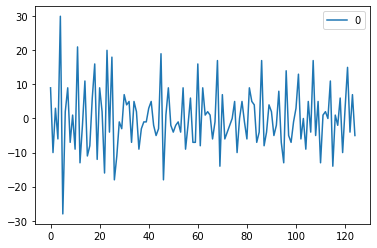

In [10]:
# plot residuals
residuals.plot()
plt.show()

In [11]:
# summary statistics
print(residuals.describe())

                0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


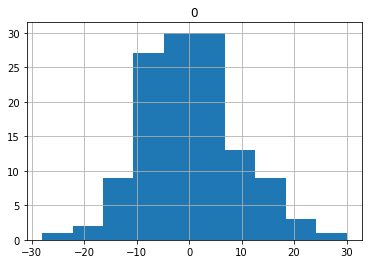

In [12]:
# histogram plot
residuals.hist()
plt.show()

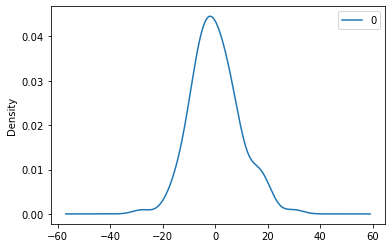

In [13]:
# density plot
residuals.plot(kind='kde')
plt.show()

In [14]:
from statsmodels.graphics.gofplots import qqplot

In [20]:
residuals = np.array(residuals)

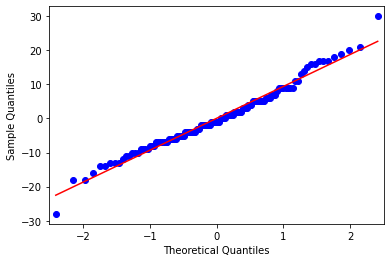

In [21]:
qqplot(residuals, line='r')
plt.show()

In [22]:
from pandas.plotting import autocorrelation_plot

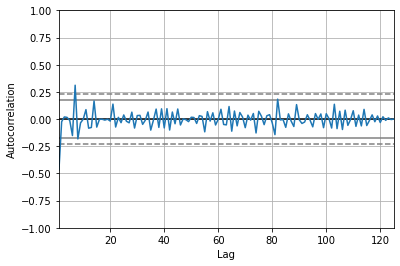

In [23]:
autocorrelation_plot(residuals1)
plt.show()